In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Filter data for digits 0 and 1
filter_mask = (y_train == 0) | (y_train == 1)
X_train, y_train = X_train[filter_mask], y_train[filter_mask]
filter_mask = (y_test == 0) | (y_test == 1)
X_test, y_test = X_test[filter_mask], y_test[filter_mask]

# Normalize the data
X_train = X_train.reshape(-1, 28*28).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28*28).astype('float32') / 255.0

# Logistic regression model
model = keras.Sequential([
    layers.Dense(1, activation='sigmoid', input_shape=(784,))
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 1)                   │             785 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Test model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy (0 vs 1): {test_acc * 100:.2f}%')


Epoch 1/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8862 - loss: 0.2686 - val_accuracy: 0.9961 - val_loss: 0.0324
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9967 - loss: 0.0284 - val_accuracy: 0.9984 - val_loss: 0.0156
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9976 - loss: 0.0148 - val_accuracy: 0.9984 - val_loss: 0.0095
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9985 - loss: 0.0099 - val_accuracy: 0.9992 - val_loss: 0.0069
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9984 - loss: 0.0079 - val_accuracy: 0.9992 - val_loss: 0.0051
Epoch 6/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9983 - loss: 0.0075 - val_accuracy: 0.9992 - val_loss: 0.0038
Epoch 7/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9985 - loss: 0.0067 - val_accuracy: 0.9992 - val_loss: 0.0030
Epoch 8/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9994 - loss: 0.0037 - val_accuracy: 1.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


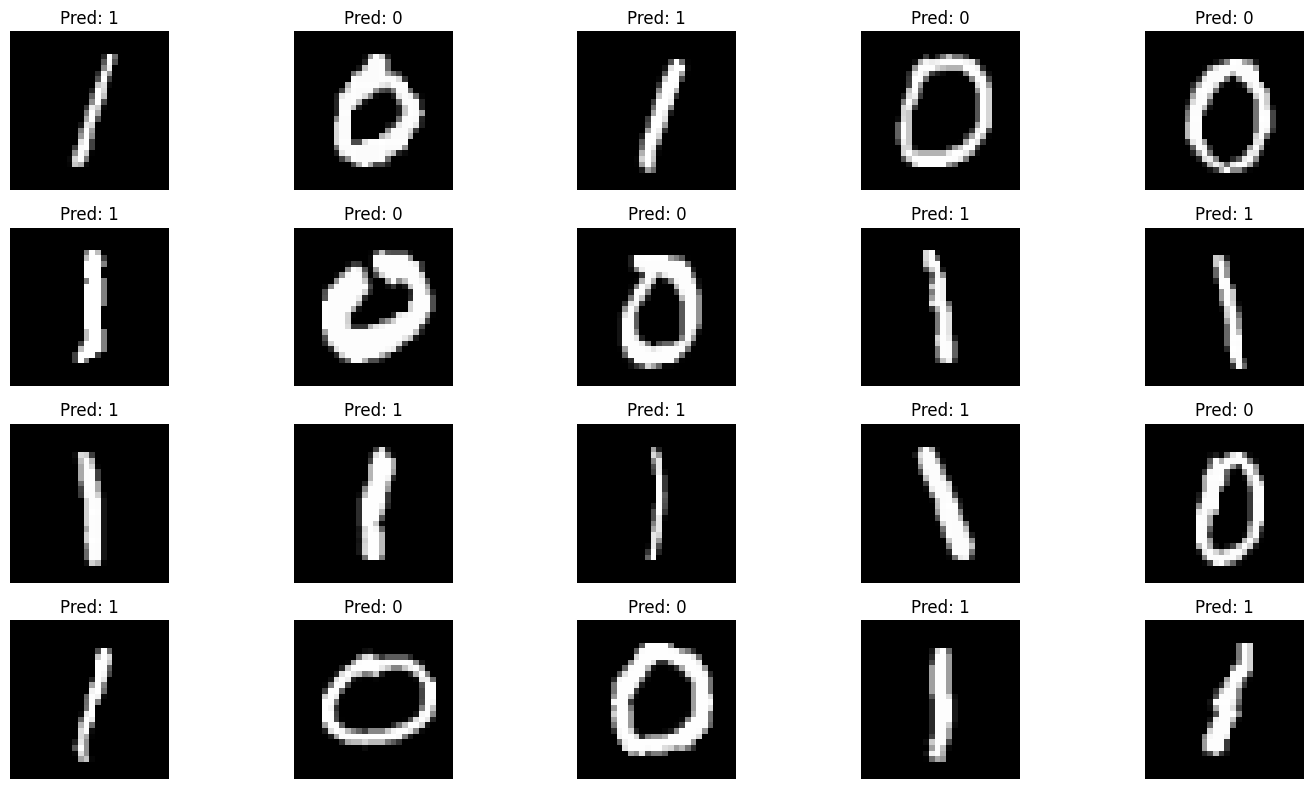

In [ ]:
import matplotlib.pyplot as plt

# Get predictions for 20 test images
predictions = model.predict(X_test[:20])

# Plot the images with predictions
plt.figure(figsize=(15, 8))
for i in range(20):
    plt.subplot(4, 5, i+1)  # 4 rows, 5 columns
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Pred: {round(predictions[i][0])}')  # Round for binary classification (0 or 1)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
model_json = model.to_json()

with open("model_architecture.json", "w") as json_file:
    json_file.write(model_json)

import json

weights = model.get_weights()
weights_list = [w.tolist() for w in weights]

with open("model_weights.json", "w") as json_file:
    json.dump(weights_list, json_file)


In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
save_path = '/content/drive/My Drive/Colab Notebooks/log-regression/'
os.makedirs(save_path, exist_ok=True)

import json
weights = model.get_weights()
weights_list = [w.tolist() for w in weights]
print(len(weights[0].flatten()))

output_dict = {
    "w": weights[0].flatten().tolist(),
    "b": weights[1].flatten().tolist()[0]
}

with open(save_path + 'model_weights.json', 'w') as f:
    json.dump(output_dict, f)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
784


In [ ]:
# Debug exported file

with open('/content/drive/My Drive/Colab Notebooks/log-regression/model_weights.json', 'r') as f:
    data = json.load(f)

print(f"Number of fields in JSON: {len(data)}")
print(f"Shape of first field: {len(data['w'])}")
print(f"Second field: {data['b']}")

Number of fields in JSON: 2
Shape of first field: 784
Second field: 0.38970157504081726
